In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

In [5]:
root = "vel_2s"
base_dir = "foot"
sub_dir = "peraxis"

df_axis_z1 = pd.read_csv(f"./{root}/{base_dir}/{sub_dir}/{base_dir}_peraxis_zero_uni_70_145.csv")
df_axis_z2 = pd.read_csv(f"./{root}/{base_dir}/{sub_dir}/{base_dir}_peraxis_zero_bi_70_145.csv")


c = "a"
ref = df_axis_z1["bpm"].to_numpy()
# using zero uni point
tempo_x_z1 = df_axis_z1[f"X_{c}"].to_numpy()    # "X_{c}"
tempo_y_z1 = df_axis_z1[f"Y_{c}"].to_numpy()
tempo_z_z1 = df_axis_z1[f"Z_{c}"].to_numpy()
tempo_mode_z1 = df_axis_z1[f"bpm_mode"].to_numpy()
tempo_median_z1 = df_axis_z1[f"bpm_median"].to_numpy()
# using zero bi point
tempo_x_z2 = df_axis_z2[f"X_{c}"].to_numpy()
tempo_y_z2 = df_axis_z2[f"Y_{c}"].to_numpy()
tempo_z_z2 = df_axis_z2[f"Z_{c}"].to_numpy()
tempo_mode_z2 = df_axis_z2[f"bpm_mode"].to_numpy()
tempo_median_z2 = df_axis_z2[f"bpm_median"].to_numpy()

### oe1 oe2 acc1 acc2 m3

In [6]:
# Data for each experiment
experiments = {
    "zero_uni": [tempo_x_z1, tempo_y_z1, tempo_z_z1,tempo_mode_z1, tempo_median_z1],
    "zero_bi": [tempo_x_z2, tempo_y_z2, tempo_z_z2,tempo_mode_z2, tempo_median_z2],

}
axes = ["X", "Y", "Z", "mode", "median"]

# Initialize results storage
results = {"experiment": [], "axis": [], "acc1": [], "acc2": [], "acc3": [],
           "hits_idx": [], "hits_dbl_idx": [], "hits_hf_idx": []}

tolerance = 8
for exp_name, data in experiments.items():
    for axis_name, calculated in zip(axes, data):
        metrics, hits_idx, hits_dbl_idx, hits_hf_idx = calculate_metrics_with_oe(ref, calculated, tolerance = tolerance)
        
        results["experiment"].append(exp_name)
        results["axis"].append(axis_name)
        results["acc1"].append(metrics["acc1"])
        results["acc2"].append(metrics["acc2"])
        results["acc3"].append(metrics["acc3"])
        
        results["hits_idx"].append(hits_idx.tolist())
        results["hits_dbl_idx"].append(hits_dbl_idx.tolist())
        results["hits_hf_idx"].append(hits_hf_idx.tolist())

results_df = pd.DataFrame(results)
results_df.to_csv(f'./{root}/{base_dir}/plots/{root}_{base_dir}_{sub_dir}_score.csv')

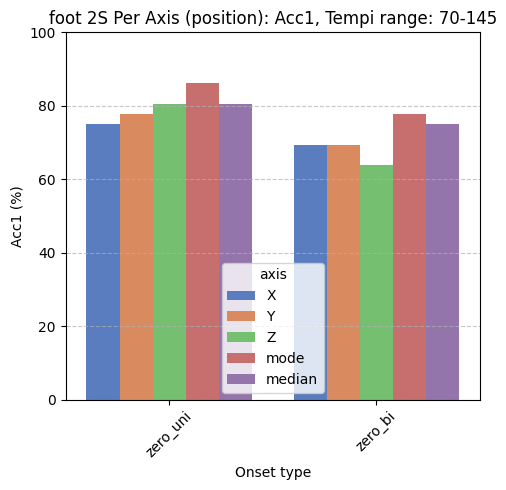

In [22]:
# Plot using Seaborn
plt.figure(figsize=(5, 5), dpi=100)  # Adjust figure size for better readability
sns.barplot(data=results_df, x="experiment", y="acc1", palette="muted", hue="axis")

plt.xlabel("Onset type")
plt.ylabel("Acc1 (%)")
plt.title(f"{base_dir} 2S Per Axis (position): Acc1, Tempi range: 70-145")
plt.xticks(rotation=45)             # Rotate labels if necessary
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig(f'./{root}/{base_dir}/plots/{base_dir}_{sub_dir}_acc1_70-145.png')
plt.show()

In [ ]:
# Plot metrics for each experiment
for exp_name in results_df["experiment"].unique():
    exp_data = results_df[results_df["experiment"] == exp_name]
    
    x = np.arange(len(exp_data))  # Axes: X, Y, Z, XYZ
    bar_width = 0.15

    plt.figure(figsize=(5, 5))
    plt.bar(x - 2 * bar_width, exp_data["acc1"], bar_width, label="Acc1 (Strict)", color="blue")
    plt.bar(x - bar_width, exp_data["acc2"], bar_width, label="Acc2 (Double/Half)", color="green")
    # plt.bar(x, exp_data["Metric3"], bar_width, label="Metric3 (Subdivisions)", color="purple")
    # plt.bar(x + bar_width, exp_data["OE1"], bar_width, label="OE1 (Strict Overestimation)", color="orange")
    # plt.bar(x + 2 * bar_width, exp_data["OE2"], bar_width, label="OE2 (Hierarchical Overestimation)", color="red")



    plt.xticks(x, exp_data["axis"])
    plt.xlabel("Axes")
    plt.ylabel("Percentage (%)")
    plt.title(f"Per Axis - Left Foot -{exp_name}")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 100)
    plt.savefig(f'./plots/left_foot_{exp_name}.png')
    plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(ref, bins=10)